# Clustering: Wholesale customers

The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc.

In [117]:
import pandas as pd
import numpy as np

import warnings
# Filter out FutureWarnings from scikit-learn
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")


In [118]:
df=pd.read_csv('Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [120]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

no null values in the dataset

#### Clustering is the process of dividing the entire data into groups (also known as clusters) based on the patterns in the data

### The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid.

#### Step 1: Choose the number of clusters k

#### Step 2: Select k random points from the data as centroids

#### Step 3: Assign all the points to the closest cluster centroid

#### Step 4: Recompute the centroids of newly formed clusters

#### Step 5: Repeat steps 3 and 4

### preprocessing with standard scaler

In [121]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_scaled=sc.fit_transform(df)

In [122]:
df_scaled

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [123]:
dff=pd.DataFrame(df_scaled)

In [124]:
dff.head(4)

,0,1,2,3,4,5,6,7
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411


## Fit Data

In [125]:
from sklearn.cluster import KMeans
model=KMeans()

In [126]:
model.fit(dff)

KMeans()

In [127]:
model.inertia_

1068.9214301030897

##  Find optimum value of K : elbow method
let’s see how we can use the elbow curve to determine the optimum number of clusters in Python.

Keeping this in mind, we can say that the lesser the inertia value, the better our clusters are.

In [128]:
sse = []  # Initialize a list to store SSE (sum of squared distances)
for k in range(1, 20):
    model= KMeans(n_clusters=k, random_state=42)
    model.fit(dff)
    sse.append(model.inertia_)

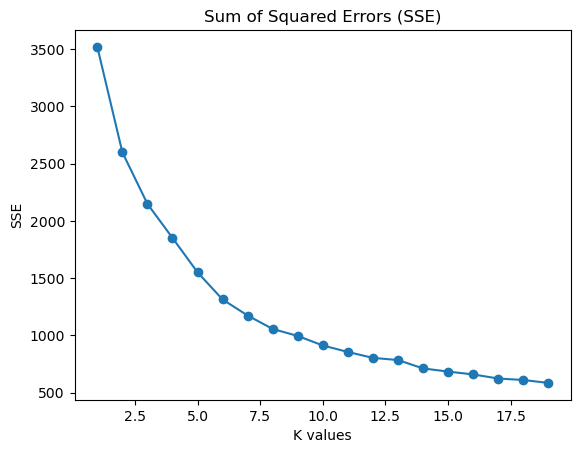

In [129]:
# Define your range of x values (1 to 10)
x_values=range(1,20)
sse_values=sse

# create plot
plt.plot(x_values,sse_values, marker='o')

# Add labels and title (optional)
plt.xlabel('K values')
plt.ylabel('SSE')
plt.title('Sum of Squared Errors (SSE)')
plt.show()

### Build the final model
We will choose K=5 and fit the model.

In [130]:
model=KMeans(n_clusters=10,random_state=42)
model.fit(dff)

KMeans(n_clusters=10, random_state=42)

In [131]:
model.inertia_

912.5084781932371

In [132]:
print('SSE : ',model.inertia_)
print('\nCentroids: \n', model.cluster_centers_)

SSE :  912.5084781932371

Centroids: 
 [[-6.27386830e-01  2.86431767e-01  3.33588172e-01 -2.74146113e-01
  -4.45359596e-01  1.55893987e+00 -4.88682264e-01  3.89878547e-03]
 [ 1.44865163e+00  3.00401811e-01 -2.95285639e-01  2.35696393e-01
   3.99232904e-01 -3.58849330e-01  4.12770613e-01 -1.71171865e-02]
 [-5.74678237e-01 -1.73324647e+00 -1.29878123e-01 -3.22925718e-01
  -3.96994356e-01 -5.87061350e-02 -4.03661733e-01 -1.64266355e-01]
 [ 1.44865163e+00 -3.38679203e-01 -4.76124803e-01  1.49503264e+00
   1.86227486e+00 -2.54050900e-01  1.98223390e+00  3.30229500e-01]
 [-6.90297086e-01  5.90668285e-01  1.96681731e+00  5.17550306e+00
   1.28721685e+00  6.90059988e+00 -5.54861977e-01  1.64784475e+01]
 [-6.90297086e-01 -1.14607279e-01  3.83071671e+00  7.21166874e-02
  -7.32938902e-02  1.32245668e+00 -3.21654227e-01  7.38769230e-01]
 [-5.97299316e-01  4.78233050e-01  1.20388827e+00 -3.83774345e-01
  -3.97818323e-01 -1.41099766e-01 -4.64412234e-01  1.69548048e-02]
 [-6.90297086e-01  5.62354303e

In [133]:
pred = model.predict(dff)

In [134]:
pred

array([1, 1, 1, 0, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 7, 1, 7, 1, 7, 1, 7,
       0, 3, 1, 1, 7, 7, 3, 6, 6, 7, 6, 6, 7, 1, 6, 1, 1, 5, 0, 6, 1, 3,
       1, 3, 1, 8, 1, 3, 7, 7, 6, 1, 6, 7, 3, 1, 7, 7, 1, 8, 1, 1, 7, 3,
       7, 1, 7, 7, 0, 6, 0, 1, 1, 6, 7, 3, 7, 7, 7, 1, 1, 6, 1, 8, 8, 5,
       0, 6, 7, 0, 3, 9, 1, 7, 1, 7, 7, 7, 1, 1, 1, 5, 7, 7, 1, 1, 1, 1,
       7, 1, 0, 7, 6, 7, 7, 7, 6, 7, 6, 7, 7, 1, 6, 5, 0, 1, 7, 6, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 0, 6, 3, 7, 7, 7, 6, 7, 7, 6, 7,
       7, 3, 1, 6, 1, 1, 1, 7, 7, 3, 1, 1, 1, 7, 7, 7, 1, 3, 7, 1, 7, 1,
       5, 7, 7, 7, 7, 5, 7, 4, 7, 7, 7, 7, 1, 1, 0, 7, 7, 1, 7, 0, 0, 1,
       2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 1, 2, 3, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 5, 5, 2, 2, 2, 2,
       1, 2, 3, 2, 1, 2, 2, 2, 2, 6, 7, 7, 6, 0, 7, 1, 7, 1, 5, 0, 5, 6,
       7, 0, 7, 6, 7, 7, 7, 1, 6, 1, 2, 1, 1, 7, 1,

In [135]:
dff['cluster'] = pred

In [136]:
print('\nCount in each cluster: \n', dff['cluster'].value_counts())


Count in each cluster: 
 7    137
1     98
2     74
6     46
0     34
3     32
5     11
8      5
9      2
4      1
Name: cluster, dtype: int64


We can see that 8th cluster has maximum number of samples, while 5th cluster has minimum number of samples.

#### Cluster Labels:
Each cluster is assigned a label starting from 0 up to the total number of clusters minus one. In this case, it appears that there are 10 clusters, labeled from 0 to 9.

#### Count in Each Cluster:
The count in each cluster tells you how many data points from your dataset have been assigned to that particular cluster. For example, the 7th cluster has 137 data points, the 1st cluster has 98 data points, and so on.

#### Cluster Homogeneity:
In general, you would prefer clusters to be relatively balanced in terms of size. Highly imbalanced clusters might indicate that the algorithm is not performing well for some portions of your data.

### silhouette_score function
The silhouette_score function calculates the average Silhouette Score for all data points in your dataset. The score ranges from -1 (poor clustering) to 1 (good clustering). A higher average Silhouette Score indicates better-defined and well-separated clusters.

In [137]:
from sklearn.metrics import silhouette_score

In [138]:
silhouette_avg = silhouette_score(dff,pred)

In [139]:
# Print the Silhouette Score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.46688351164227304


The Silhouette Score of 0.46688351164227304 is a moderately good score, but its interpretation depends on the context of your clustering problem. Here's a general guideline for interpreting Silhouette Scores:


A Silhouette Score closer to 1 indicates that the clusters are well-separated and have a good level of distinction between them. This suggests that the clustering is effective.


A Silhouette Score closer to 0 suggests that data points may be on or near the decision boundary between two neighboring clusters. This means that the clusters are less distinct, and the data points could be assigned to multiple clusters.


A Silhouette Score closer to -1 indicates that data points have been assigned to the wrong clusters, as they are more similar to neighboring clusters than to their assigned cluster.